# Supervised Learning - Clasificación de universidades con kNN

**Autor:** Brandon Andrés Jiménez Nieto

## Introducción
En este notebook aplicamos **k-Nearest Neighbors (kNN)** para **clasificar universidades** como **Privadas (Yes)** o **Públicas (No)** usando el dataset **College** (archivo `College_data.csv`). El archivo contiene **777** instituciones y **18** variables relacionadas con **admisiones**, **costos**, **características del cuerpo docente**, **gasto por estudiante** y **resultados académicos**.


**Objetivo del problema:**  
Dado un conjunto de indicadores institucionales, **predecir si una universidad es privada o pública**. Esta es una **tarea de clasificación binaria** donde la etiqueta es `private` con valores **Yes/No**.


**Origen del dataset:**  
Conjunto “**College data**” (Kaggle). El archivo `data.csv` reporta 777 observaciones y 18 variables.

---

## Variables del dataset

- `private`: indicador **Yes/No** de si la universidad es privada (**Yes**) o pública (**No**).
- `apps`: número de **solicitudes** recibidas.  
- `accept`: número de **admisiones** otorgadas.  
- `enroll`: número de **estudiantes nuevos** matriculados.  
- `top10perc`: % de estudiantes nuevos provenientes del **top 10%** de su promoción en secundaria.  
- `top25perc`: % de estudiantes nuevos del **top 25%**.  
- `f_undergrad`: número de **estudiantes de tiempo completo** (undergrad).  
- `p_undergrad`: número de **estudiantes de tiempo parcial** (undergrad).  
- `outstate`: **arancel** para estudiantes **fuera del estado**.  
- `room_board`: costo de **residencia y comida**.  
- `books`: gasto **estimado** en **libros**.  
- `personal`: gasto **estimado** en **gastos personales**.  
- `phd`: % del **profesorado con Ph.D.**  
- `terminal`: % del profesorado con **título terminal**.  
- `s_f_ratio`: **ratio estudiantes/profesor**.  
- `perc_alumni`: % de **exalumnos** que **donan**.  
- `expend`: **gasto instruccional por estudiante**.  
- `grad_rate`: **tasa de graduación**.

---

## Selección de variables predictoras (X)

Trabajaremos solo con tres variables

- `expend` — gasto instruccional por estudiante (inversión académica).
- `grad_rate` — tasa de graduación (resultado académico)
- `s_f_ratio` — relación estudiante/profesor (atención docente).



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# %pip install ipywidgets
# %pip install seaborn
# %matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

In [ ]:
# Cargamos la base de datos 'College_data.csv'
file_path = "/content/drive/MyDrive/IA/Datasets/College_data.csv"
colleges = pd.read_csv(file_path)

In [ ]:
colleges.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
colleges.tail()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99
776,Yes,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99


In [ ]:
colleges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [ ]:
colleges.describe().T

,count,mean,std,min,25%,50%,75%,max
apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
f_undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
p_undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
room_board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


`expend`: media alrededor de 9`–`10 mil por estudiante; rango amplio (desde ~3 mil hasta valores muy altos >50 mil), lo que indica alta variabilidad (algunas instituciones invierten muchísimo).

`grad_rate`: media en torno a 65%, hay outliers por arriba.

`s_f_ratio`: media `~`14 estudiantes por docente, con Q1 cercano a 11`–`12 y Q3 alrededor de 16; existe un máximo alto (`~`40), lo que muestra casos con clases grandes.

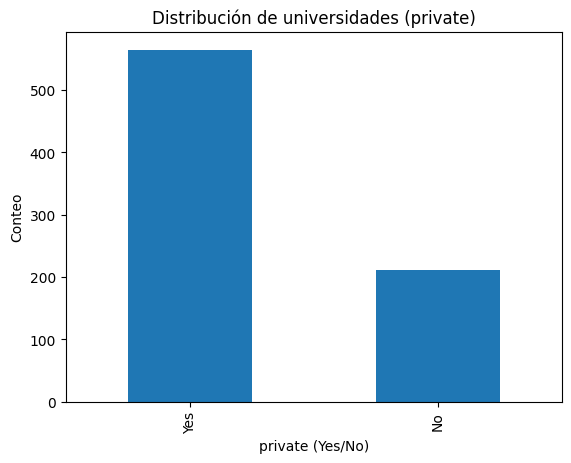

In [ ]:
# Distribución de clases (private: Yes/No)
ax = colleges['private'].value_counts().plot(kind='bar')
ax.set_title('Distribución de universidades (private)')
ax.set_xlabel('private (Yes/No)')
ax.set_ylabel('Conteo')
plt.show()


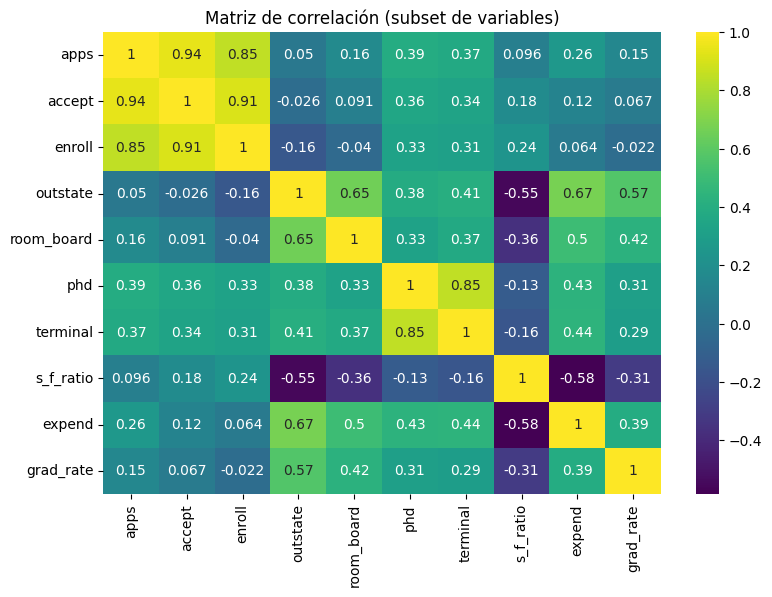

In [ ]:
# Matriz de correlación entre las 3 variables numéricas seleccionadas
plt.figure(figsize=(9,6))
sns.heatmap(colleges[['apps','accept','enroll','outstate','room_board','phd','terminal','s_f_ratio','expend','grad_rate']].corr(),
            annot=True, cmap='viridis')
plt.title('Matriz de correlación (subset de variables)')
plt.show()


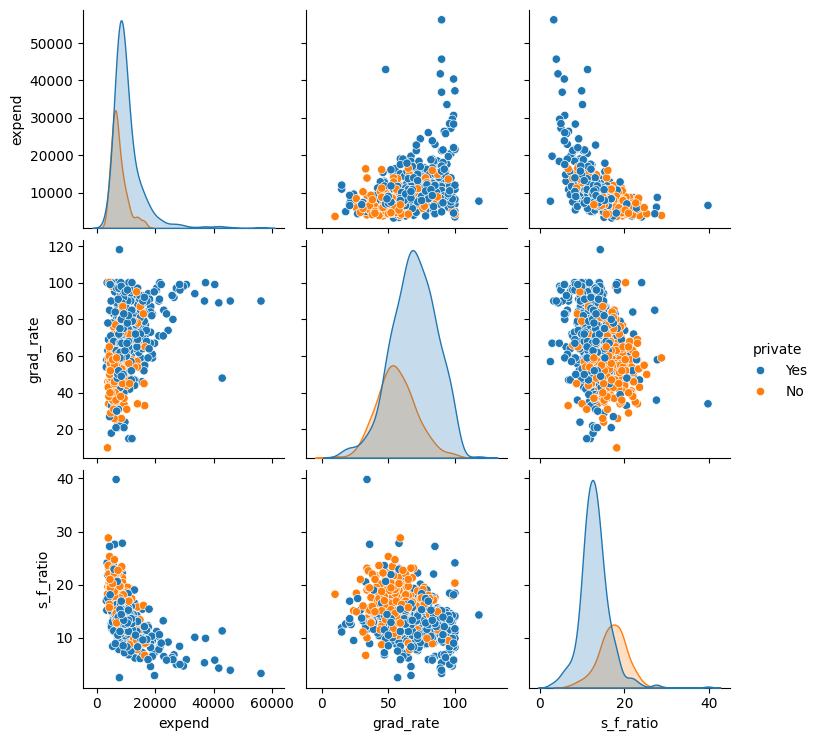

In [ ]:
# Subconjunto solo con las 3 variables elegidas + etiqueta
eda_cols = ['expend', 'grad_rate', 's_f_ratio', 'private']

sns.pairplot(colleges[eda_cols], hue='private')
plt.show()


`+` gasto `expend`

`+` graduación `grad_rate`

`-` ratio `s_f_ratio`

parecen asociarse con características de universidades privadas

En expend, los puntos Yes (privadas) se concentran más en gastos altos; los No (públicas), en gastos más bajos.

En grad_rate, las privadas tienden a ligeramente más altas tasas de graduación.

En s_f_ratio, las privadas aparecen más a la izquierda (ratios menores → clases más pequeñas).

En los scatter:

expend vs grad_rate: se ve una nube ascendente (más gasto tiende a más graduación).

expend vs s_f_ratio: se observa tendencia descendente (más gasto, menor ratio, más profes por alumno).

grad_rate vs s_f_ratio: leve tendencia negativa (clases más pequeñas, más graduación).

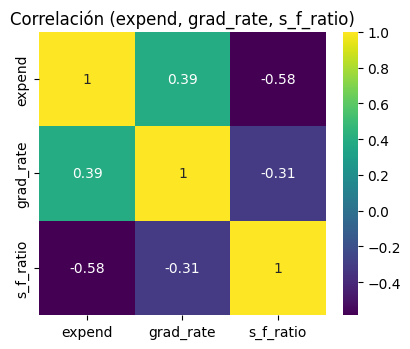

In [ ]:
# Matriz de correlación entre las 3 variables numéricas seleccionadas
plt.figure(figsize=(4.2, 3.6))
sns.heatmap(colleges[['expend','grad_rate','s_f_ratio']].corr(), cmap='viridis', annot=True)
plt.title('Correlación (expend, grad_rate, s_f_ratio)')
plt.tight_layout()
plt.show()


`expend` está asociado a recursos,

`s_f_ratio` a tamaño de clase/atención,

`grad_rate` a resultado final.

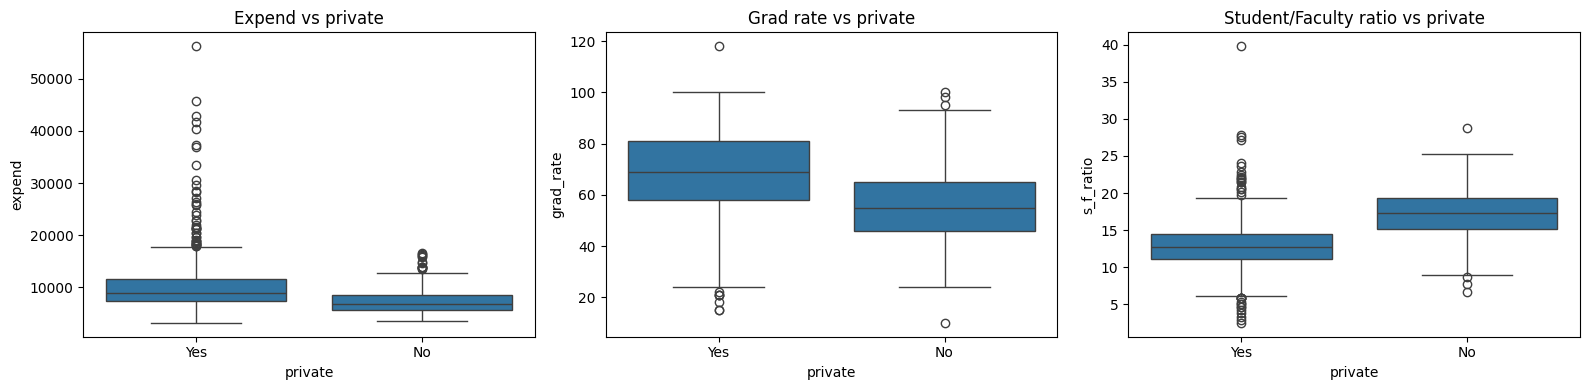

In [ ]:
# Boxplots por tipo de universidad para cada variable seleccionada
fig, axes = plt.subplots(1, 3, figsize=(16,4))

sns.boxplot(data=colleges, x='private', y='expend', ax=axes[0])
axes[0].set_title('Expend vs private')

sns.boxplot(data=colleges, x='private', y='grad_rate', ax=axes[1])
axes[1].set_title('Grad rate vs private')

sns.boxplot(data=colleges, x='private', y='s_f_ratio', ax=axes[2])
axes[2].set_title('Student/Faculty ratio vs private')

plt.tight_layout()
plt.show()


Las universidades privadas tienen una mediana de gasto por estudiante mayor que las públicas.

La mediana de la tasa de graduación es más alta en las privadas.

Las privadas ofrecen más atención individual (grupos pequeños), mientras que en públicas los profesores atienden a más estudiantes en promedio.



In [ ]:
# Aislamos las variables predictoras (X) y la variable objetivo (y)
features = ['expend', 'grad_rate', 's_f_ratio']
X = colleges[features]
y = colleges['private']


In [ ]:
# Verificamos tipos
X.dtypes

,0
expend,int64
grad_rate,int64
s_f_ratio,float64


In [ ]:
# Dividimos la base de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Creamos el modelo K-Nearest Neighbors con k=5 (prueba)
classifier = KNeighborsClassifier(n_neighbors=5)


Probamos con 5 que es un número impar para evitar empates entre clases.

Si k es muy pequeño puede ser muy sensible a datos mal etiquetados.

Si k es muy grande se vuelve muy general y puede no reconocer patrones locales.

In [ ]:
# Entrenamos el modelo
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predicción en el conjunto de prueba
y_pred = classifier.predict(X_test)

# Accuracy (con .score del modelo)
print("Precisión con (k=5):", classifier.score(X_test, y_test))


Precisión con (k=5): 0.7115384615384616


In [ ]:
# Reporte de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          No       0.47      0.40      0.43        43
         Yes       0.78      0.83      0.81       113

    accuracy                           0.71       156
   macro avg       0.63      0.61      0.62       156
weighted avg       0.70      0.71      0.70       156



In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix


array([[17, 26],
       [19, 94]])

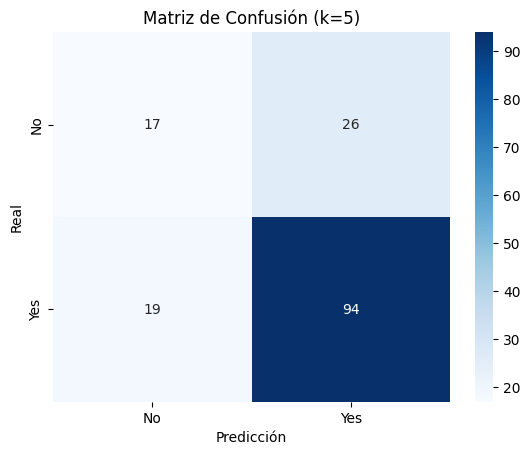

In [ ]:
# Heatmap de la matriz de confusión
sns.heatmap(
    cf_matrix,
    annot=True,
    xticklabels=sorted(y.unique()),
    yticklabels=sorted(y.unique()),
    cmap='Blues'
)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (k=5)')
plt.show()


Mejor k: 15
Accuracy en test con mejor k: 0.75


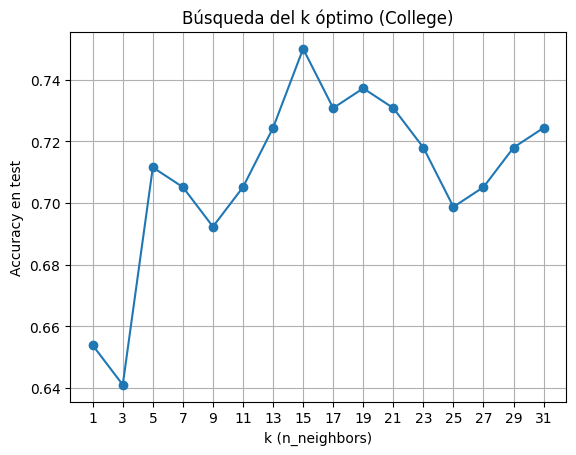

In [ ]:
# Probamos valores impares de k
from sklearn.metrics import accuracy_score

k_values = list(range(1, 32, 2))
acc_test = []

for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    y_pred_k = knn_k.predict(X_test)
    acc_k = accuracy_score(y_test, y_pred_k)
    acc_test.append(acc_k)

# k con mejor accuracy
best_k_index = pd.Series(acc_test).idxmax()
best_k = k_values[best_k_index]
best_acc = acc_test[best_k_index]

print("Mejor k:", best_k)
print("Accuracy en test con mejor k:", best_acc)

# Gráfico accuracy vs k
plt.plot(k_values, acc_test, marker='o')
plt.xticks(k_values)
plt.xlabel('k (n_neighbors)')
plt.ylabel('Accuracy en test')
plt.title('Búsqueda del k óptimo (College)')
plt.grid(True)
plt.show()


Accuracy final (test) con k óptimo: 0.75
              precision    recall  f1-score   support

          No       0.55      0.49      0.52        43
         Yes       0.81      0.85      0.83       113

    accuracy                           0.75       156
   macro avg       0.68      0.67      0.67       156
weighted avg       0.74      0.75      0.74       156



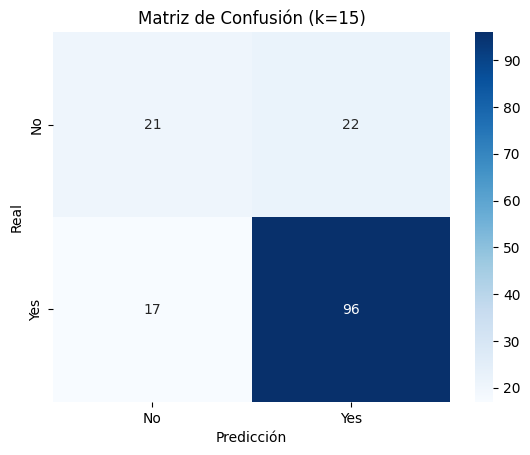

In [ ]:
# Entrenamos y evaluamos con el k óptimo
best_classifier = KNeighborsClassifier(n_neighbors=best_k)
best_classifier.fit(X_train, y_train)

y_pred_best = best_classifier.predict(X_test)
print("Accuracy final (test) con k óptimo:", accuracy_score(y_test, y_pred_best))

# Reporte y matriz de confusión con el k óptimo
print(classification_report(y_test, y_pred_best))

cf_matrix_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(
    cf_matrix_best,
    annot=True,
    xticklabels=sorted(y.unique()),
    yticklabels=sorted(y.unique()),
    cmap='Blues'
)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title(f'Matriz de Confusión (k={best_k})')
plt.show()


In [ ]:
# Nuevas universidades con las 3 columnas en el mismo orden
new_unis = pd.DataFrame([
    # expend, grad_rate, s_f_ratio
    [18000,  88, 11.5],   # inversión alta, buena grad_rate, ratio bajo
    [ 7000,  62, 18.0],   # inversión media, grad_rate moderada, ratio alto
    [12000,  75, 14.0],   # valores intermedios
    [2000,  40, 40.0],    # valores bajos
], columns=['expend','grad_rate','s_f_ratio'])

# Predicción con el modelo final
new_preds = best_classifier.predict(new_unis)
pd.DataFrame({'expend': new_unis['expend'],
              'grad_rate': new_unis['grad_rate'],
              's_f_ratio': new_unis['s_f_ratio'],
              'Prediction (private)': new_preds})


,expend,grad_rate,s_f_ratio,Prediction (private)
0,18000,88,11.5,Yes
1,7000,62,18.0,Yes
2,12000,75,14.0,Yes
3,2000,40,40.0,No


In [ ]:
import joblib
joblib.dump(best_classifier, 'knn_college_best_model.pkl')


['knn_college_best_model.pkl']

In [ ]:
# Carga del modelo guardado
loaded_model = joblib.load('knn_college_best_model.pkl')
print("Precisión del modelo cargado:", loaded_model.score(X_test, y_test))


Precisión del modelo cargado: 0.75


In [ ]:
import pandas as pd

new_unis = pd.DataFrame([
    [18000, 88, 11.5],   # gasto alto, buena grad_rate, ratio bajo
    [7000, 62, 18.0],    # gasto medio, grad_rate moderada, ratio alto
    [2000, 40, 40.0],    # gasto muy bajo
], columns=['expend', 'grad_rate', 's_f_ratio'])

# Predicción
predictions = loaded_model.predict(new_unis)
print(predictions)


['Yes' 'Yes' 'No']
